In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import json
import os
import math
import statsmodels.api as sm


# Import API key
from project_one_api import mlb_api_key
from project_one_api import nfl_api_key
from project_one_api import nhl_api_key
from project_one_api import nba_api_key

# File to Load
nfl_payroll_file = "NFLFiles/nfl_payroll_new.csv"

# Read Purchasing File and store into Pandas data frame
nfl_payroll_data = pd.read_csv(nfl_payroll_file, encoding="utf-8")

# nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].str.replace(',', '')
# nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].str.replace('$', '')

# Convert columns from string to float
nfl_payroll_data['Year'] = nfl_payroll_data['Year'].astype(str)
nfl_payroll_data['Payroll'] = nfl_payroll_data['Payroll'].astype(float)

nfl_payroll_data = nfl_payroll_data[["Team","Year","Payroll","Relative Payroll"]]

nfl_payroll_data["Team"] = nfl_payroll_data["Year"] + nfl_payroll_data["Team"].map(str)

nfl_payroll_data = nfl_payroll_data[["Team", "Payroll", "Relative Payroll"]]
nfl_payroll_data["Relative Payroll"] = nfl_payroll_data["Relative Payroll"]*100

nfl_payroll_data.head()

,Team,Payroll,Relative Payroll
0,2014Falcons,175728823.0,128.092328
1,2014Browns,156240488.0,113.886883
2,2014Ravens,152294429.0,111.010520
3,2014Cardinals,151750413.0,110.613976
4,2014Seahawks,151634452.0,110.529449


In [14]:
### NFL STATS AND PAYROLL ###

nfl_pd = pd.DataFrame({"Team": [""], "Win Pct": [""], "Year": [""], "Points For": [""], "Points Against": [""], "Point Differential": [""]})

years = [2014, 2015, 2016, 2017, 2018]
nfl_all_data = []

for year in years:
    nfl_query_url = f"https://api.sportradar.us/nfl/official/trial/v5/en/seasons/{year}/standings.json?api_key={nfl_api_key}"
    nfl_standings_response = requests.get(nfl_query_url)
    time.sleep(2)
    nfl_standings = nfl_standings_response.json()
    nfl_all_data.append(nfl_standings)
        
# loop through each year        
for w in range(0, len(nfl_all_data)):
   #loop through division
    for z in range(0,len(nfl_all_data[w]['conferences'])):
        for y in range(0,len(nfl_all_data[w]['conferences'][z]['divisions'])): 
            for x in range(0,len(nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'])):
                nfl_team_name = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['name']
                nfl_win_pct = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['win_pct']
                nfl_pts_for = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['points_for']
                nfl_pts_against = nfl_all_data[w]['conferences'][z]['divisions'][y]['teams'][x]['points_against']
                nfl_year = nfl_all_data[w]['season']['year']
                nfl_pd = nfl_pd.append({'Team' : nfl_team_name, 'Win Pct': nfl_win_pct, 'Year': nfl_year, 'Points For': nfl_pts_for, 
                                       'Points Against': nfl_pts_against}, ignore_index = True)
                
nfl_pd = nfl_pd.drop([0])

# Convert columns from string to float
nfl_pd['Year'] = nfl_pd['Year'].astype(str)
nfl_pd['Win Pct'] = nfl_pd['Win Pct'].astype(float)
nfl_pd['Points For'] = nfl_pd['Points For'].astype(float)
nfl_pd['Points Against'] = nfl_pd['Points Against'].astype(float)
nfl_pd['Point Differential'] = nfl_pd['Points For'] - nfl_pd['Points Against']

nfl_pd["Team"] = nfl_pd["Year"] + nfl_pd["Team"].map(str)

nfl_pd.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential
1,2014Patriots,0.750,2014,468.0,313.0,155.0
2,2014Bills,0.563,2014,343.0,289.0,54.0
3,2014Dolphins,0.500,2014,388.0,373.0,15.0
4,2014Jets,0.250,2014,283.0,401.0,-118.0
5,2014Steelers,0.688,2014,436.0,368.0,68.0


In [15]:
nfl_merged = pd.merge(nfl_pd, nfl_payroll_data, on='Team')
nfl_merged["Sport"] = "NFL"

nfl_merged.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential,Payroll,Relative Payroll,Sport
0,2014Patriots,0.750,2014,468.0,313.0,155.0,132130517.0,96.312633,NFL
1,2014Bills,0.563,2014,343.0,289.0,54.0,135589765.0,98.834149,NFL
2,2014Dolphins,0.500,2014,388.0,373.0,15.0,144645040.0,105.434724,NFL
3,2014Jets,0.250,2014,283.0,401.0,-118.0,106085353.0,77.327781,NFL
4,2014Steelers,0.688,2014,436.0,368.0,68.0,138857568.0,101.216117,NFL


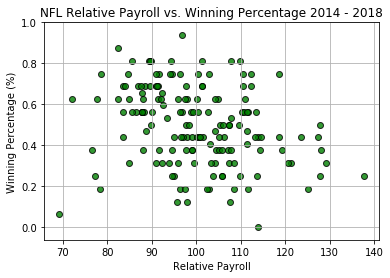

In [17]:
# Set x and y variables
x = nfl_merged["Relative Payroll"]
y = nfl_merged["Win Pct"]

# Build scatter plot
plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black", alpha=0.8, linewidth=1, label="Relative Payroll v Win %")

plt.title(f"NFL Relative Payroll vs. Winning Percentage 2014 - 2018")
plt.xlabel("Relative Payroll")
plt.ylabel("Winning Percentage (%)")
plt.grid()

# Save image
plt.savefig("Images/NFL_plot.png")

# Show image
plt.show()

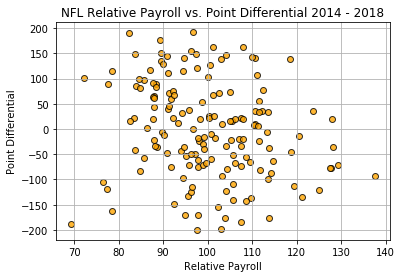

In [18]:
# Set x and y variables
y2 = nfl_merged["Point Differential"]

# Build scatter plot
plt.scatter(x, y2, marker="o", facecolors="orange", edgecolors="black", alpha=0.8, linewidth=1, label="Relative Payroll v Win %")

plt.title(f"NFL Relative Payroll vs. Point Differential 2014 - 2018")
plt.xlabel("Relative Payroll")
plt.ylabel("Point Differential")
plt.grid()


# Save image
plt.savefig("Images/NFL_plot2.png")

# Show image
plt.show()

In [19]:
nfl_newmerge_df = nfl_merged[["Team","Win Pct","Relative Payroll","Sport"]]
nfl_newmerge_df = nfl_newmerge_df.rename(columns={"Team": "TeamYear","Win Pct":"Win Ratio","Relative Payroll":"RelPayPerYear"})
nfl_newmerge_df.head(5)


,TeamYear,Win Ratio,RelPayPerYear,Sport
0,2014Patriots,0.750,96.312633,NFL
1,2014Bills,0.563,98.834149,NFL
2,2014Dolphins,0.500,105.434724,NFL
3,2014Jets,0.250,77.327781,NFL
4,2014Steelers,0.688,101.216117,NFL


In [88]:
##Henry Starts Copying in NBA Code HERE


In [ ]:
# We will attempt to get data on regular season wins and postseason wins for each team going back twenty years or 
#as long as the API has data for.  We are using sportsradar api

In [ ]:
# Sportradar documentation: 

#This endpoint retrieves the current Standings.

# https://api.sportradar.us/nba/{access_level}/{version}/{language_code}/seasons/{season_year}/{nba_season}/
#standings.{format}?api_key={your_api_key}

In [13]:
# We will run a test first, but some of the items for the test will persist

In [31]:
#dependencies
from pprint import pprint
nba_csv_file = "NBAFiles/ProjectOne/NBASalaryDataCSV.csv"

In [32]:
nba_salary_df = pd.read_csv(nba_csv_file)

In [33]:
nba_salary_df

,Team,Cap,Rank,YearMeanCap,RelativePay
0,Bulls2018,"$90,105,625",1,"$110,191,023",81.8%
1,Suns2018,"$92,518,634",2,"$110,191,023",84.0%
2,Pacers2018,"$93,661,969",3,"$110,191,023",85.0%
3,Magic2018,"$95,538,311",4,"$110,191,023",86.7%
4,Nets2018,"$95,964,560",5,"$110,191,023",87.1%
5,Mavericks2018,"$96,843,033",6,"$110,191,023",87.9%
6,Kings2018,"$97,154,206",7,"$110,191,023",88.2%
7,76ers2018,"$100,020,936",8,"$110,191,023",90.8%
8,Hawks2018,"$100,108,457",9,"$110,191,023",90.8%
9,Lakers2018,"$102,177,393",10,"$110,191,023",92.7%


In [34]:
nba_salary_df = nba_salary_df.rename(columns={"Team":"ConcatName"})
nba_salary_df.head()

,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,Bulls2018,"$90,105,625",1,"$110,191,023",81.8%
1,Suns2018,"$92,518,634",2,"$110,191,023",84.0%
2,Pacers2018,"$93,661,969",3,"$110,191,023",85.0%
3,Magic2018,"$95,538,311",4,"$110,191,023",86.7%
4,Nets2018,"$95,964,560",5,"$110,191,023",87.1%


In [35]:
#Parameters


access_level = "trial"
version = "v5"
language_code = "en"
#Season year in Four Digit Format; Also, will need to make this a list when not in "test" mode
season_year = ["2013","2014","2015","2016","2017","2018"]
#nba_season refers to Pre, Regular, or Post; options are PRE, REG or PST
nba_season = "REG"
format_parameter = "json"
#need to remove key if it works
api_key = nba_api_key
base_url = "https://api.sportradar.us/nba/"

In [ ]:
#print(kims_apikey)

In [ ]:
#NBA Specific Info Needed for Queries:

In [36]:
# Lists to Hold Data

teams = []
division_list=[]
conference_list=[]
wins = []
losses = []
win_pct = []
points_for_list=[]
points_against_list=[]
cities = []
season_list =[]
regular_or_pst = []

In [26]:
nba_responses_dict = {}

In [23]:
#url assembly

#nba_url = f"{base_url}{access_level}/{version}/{language_code}/seasons/{season}/{nba_season}/standings/.{format_parameter}?api_key={api_key}"

#print(nba_url)

In [37]:
for season in season_year:
    #Finish URL 
    nba_url = f"{base_url}{access_level}/{version}/{language_code}/seasons/{season}/{nba_season}/standings.{format_parameter}?api_key={nba_api_key}"
    #print(nba_url)
    nba_response = requests.get(nba_url).json()
    time.sleep(2)
    nba_responses_dict[season]=nba_response
    season=season

In [81]:
#nba_responses_dict["2013"]

In [39]:
nba_responses_dict.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018'])

In [40]:
pprint(nba_response)

{'conferences': [{'alias': 'WESTERN',
                  'divisions': [{'alias': 'PACIFIC',
                                 'id': 'f074cb3e-90cf-42e1-8067-cdbcd99ec230',
                                 'name': 'Pacific',
                                 'teams': [{'games_behind': {'conference': 0.0,
                                                             'division': 0.0,
                                                             'league': 4.5},
                                            'id': '583ec825-fb46-11e1-82cb-f4ce4684ea4c',
                                            'losses': 20,
                                            'market': 'Golden State',
                                            'name': 'Warriors',
                                            'point_diff': 5.84,
                                            'points_against': 112.38,
                                            'points_for': 118.22,
                                            'records': [{'los

                                                         'wins': 9},
                                                        {'losses': 16,
                                                         'record_type': 'road',
                                                         'win_pct': 0.515,
                                                         'wins': 17},
                                                        {'losses': 17,
                                                         'record_type': 'scores_100_or_more',
                                                         'win_pct': 0.685,
                                                         'wins': 37},
                                                        {'losses': 3,
                                                         'record_type': 'southeast',
                                                         'win_pct': 0.625,
                                                         'wins': 5},
                          

                                                         'record_type': 'southwest',
                                                         'win_pct': 0.533,
                                                         'wins': 8},
                                                        {'losses': 6,
                                                         'record_type': 'ten_points',
                                                         'win_pct': 0.76,
                                                         'wins': 19},
                                                        {'losses': 3,
                                                         'record_type': 'three_points',
                                                         'win_pct': 0.769,
                                                         'wins': 10}],
                                            'reference': '1610612743',
                                            'sr_id': 'sr:team:3417',
                           

                                                        {'losses': 2,
                                                         'record_type': 'equal_turnovers',
                                                         'win_pct': 0.5,
                                                         'wins': 2},
                                                        {'losses': 11,
                                                         'record_type': 'fewer_turnovers',
                                                         'win_pct': 0.621,
                                                         'wins': 18},
                                                        {'losses': 16,
                                                         'record_type': 'home',
                                                         'win_pct': 0.515,
                                                         'wins': 17},
                                                        {'losses': 4,
                        

                                                         'record_type': 'road',
                                                         'win_pct': 0.4,
                                                         'wins': 12},
                                                        {'losses': 20,
                                                         'record_type': 'scores_100_or_more',
                                                         'win_pct': 0.592,
                                                         'wins': 29},
                                                        {'losses': 7,
                                                         'record_type': 'southeast',
                                                         'win_pct': 0.533,
                                                         'wins': 8},
                                                        {'losses': 5,
                                                         'record_type': 'southwest',
             

                                                         'win_pct': 0.085,
                                                         'wins': 4},
                                                        {'losses': 35,
                                                         'record_type': 'opponent_leads_rebounds',
                                                         'win_pct': 0.103,
                                                         'wins': 4},
                                                        {'losses': 51,
                                                         'record_type': 'opponent_scores_100_or_more',
                                                         'win_pct': 0.164,
                                                         'wins': 10},
                                                        {'losses': 1,
                                                         'record_type': 'overtime',
                                                         'win_pct': 0

In [45]:
# Will attempt to use multi-layered loops to minimize lines of code.  Our goal is to collect data for each team.
# To do this will attempt a team loop within a division loop within a conference loop. 

# THIS WHOLE THING PROBABLY NEEDS TO BE SHIFTED OVER and SUBMERGED UNDER THE SEASON LOOP  HOW TO DO?


for season in season_year:
    nba_response = nba_responses_dict[season]

    for conference in nba_response['conferences']:
        conference_name = conference['alias']
        print(f"Now analyzying teams in the {conference_name} conference")
        for division in conference["divisions"]:
            division_name = division['alias']
            print(f"Now analyzing teams in the {division_name} division of the {conference_name} conference")
            for team in division["teams"]:
                team_name = team['name']
                print(f"{team_name} is in the {division_name} division of the {conference_name} conference")
                teams.append(team_name)
                division_list.append(division_name)
                conference_list.append(conference_name)
                wins.append(team["wins"])
                losses.append(team["losses"])
                win_pct.append(team["win_pct"])
                points_for_list.append(team["points_for"])
                points_against_list.append(team["points_against"])
                cities.append(team['market'])
                season_list.append(season)
                team_count = len(teams)
                if nba_season == "REG":
                    regular_or_pst.append("Regular")
                    if nba_season == "PST":
                        regular_or_post.append("Playoffs")
                        #Need otherwise statement
            print(f"Team count is now {team_count}")

            
    


Now analyzying teams in the WESTERN conference
Now analyzing teams in the PACIFIC division of the WESTERN conference
Clippers is in the PACIFIC division of the WESTERN conference
Warriors is in the PACIFIC division of the WESTERN conference
Suns is in the PACIFIC division of the WESTERN conference
Kings is in the PACIFIC division of the WESTERN conference
Lakers is in the PACIFIC division of the WESTERN conference
Team count is now 5
Now analyzing teams in the SOUTHWEST division of the WESTERN conference
Spurs is in the SOUTHWEST division of the WESTERN conference
Rockets is in the SOUTHWEST division of the WESTERN conference
Grizzlies is in the SOUTHWEST division of the WESTERN conference
Mavericks is in the SOUTHWEST division of the WESTERN conference
Pelicans is in the SOUTHWEST division of the WESTERN conference
Team count is now 10
Now analyzing teams in the NORTHWEST division of the WESTERN conference
Thunder is in the NORTHWEST division of the WESTERN conference
Trail Blazers is

In [46]:
season_list

['2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2017',

In [47]:
len(season_list)

180

In [48]:
NBA_df = pd.DataFrame({"Season": season_list, "Regular Season or Playoffs": regular_or_pst,"City": cities,"Team": teams,"Conference": conference_list,"Division": division_list,"Wins": wins,"Losses": losses, "Win Pct.": win_pct,"Points For": points_for_list, "Points Against": points_against_list})

In [32]:
NBA_df

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24
5,2013,Regular,San Antonio,Spurs,WESTERN,SOUTHWEST,62,20,0.756,105.35,97.63
6,2013,Regular,Houston,Rockets,WESTERN,SOUTHWEST,54,28,0.659,107.67,103.11
7,2013,Regular,Memphis,Grizzlies,WESTERN,SOUTHWEST,50,32,0.610,96.15,94.57
8,2013,Regular,Dallas,Mavericks,WESTERN,SOUTHWEST,49,33,0.598,104.84,102.44
9,2013,Regular,New Orleans,Pelicans,WESTERN,SOUTHWEST,34,48,0.415,99.72,102.43


In [49]:
NBA_df["ConcatName"]=NBA_df["Team"]+NBA_df["Season"].map(str)

In [50]:
NBA_df

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013
5,2013,Regular,San Antonio,Spurs,WESTERN,SOUTHWEST,62,20,0.756,105.35,97.63,Spurs2013
6,2013,Regular,Houston,Rockets,WESTERN,SOUTHWEST,54,28,0.659,107.67,103.11,Rockets2013
7,2013,Regular,Memphis,Grizzlies,WESTERN,SOUTHWEST,50,32,0.610,96.15,94.57,Grizzlies2013
8,2013,Regular,Dallas,Mavericks,WESTERN,SOUTHWEST,49,33,0.598,104.84,102.44,Mavericks2013
9,2013,Regular,New Orleans,Pelicans,WESTERN,SOUTHWEST,34,48,0.415,99.72,102.43,Pelicans2013


In [69]:
nba_combined_df =pd.merge(NBA_df,nba_salary_df,on="ConcatName")

In [70]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6%
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9%
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3%
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8%
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8%


In [71]:
nba_combined_df = nba_combined_df.replace(to_replace="%", value='',regex=True)

In [72]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8


In [73]:
nba_combined_df["RelativePay"] = nba_combined_df["RelativePay"].astype(float)

In [74]:
nba_combined_df["Sport"] = "NBA"

In [75]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay,Sport
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6,NBA
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9,NBA
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3,NBA
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8,NBA
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8,NBA


In [76]:
nba_combined_df.dtypes

Season                         object
Regular Season or Playoffs     object
City                           object
Team                           object
Conference                     object
Division                       object
Wins                            int64
Losses                          int64
Win Pct.                      float64
Points For                    float64
Points Against                float64
ConcatName                     object
Cap                            object
Rank                            int64
YearMeanCap                    object
RelativePay                   float64
Sport                          object
dtype: object

In [77]:
x_axis = nba_combined_df["RelativePay"]
y_axis = nba_combined_df['Win Pct.']

In [78]:
#new df for merge
nba_newmerge_df = nba_combined_df[["ConcatName","Win Pct.","RelativePay","Sport"]]
nba_newmerge_df = nba_newmerge_df.rename(columns={"ConcatName":"TeamYear","Win Pct.":"Win Ratio","RelativePay":"RelPayPerYear"})
nba_newmerge_df.head(5)

,TeamYear,Win Ratio,RelPayPerYear,Sport
0,Clippers2013,0.695,103.6,NBA
1,Warriors2013,0.622,103.9,NBA
2,Suns2013,0.585,79.3,NBA
3,Kings2013,0.341,79.8,NBA
4,Lakers2013,0.329,148.8,NBA


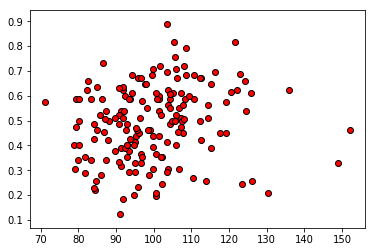

In [79]:
plt.scatter(x_axis,y_axis,marker="o",color="r",edgecolor="black")
plt.savefig("NBA Winning Percentage vs Relative Pay")

In [80]:
from scipy.stats import linregress

In [81]:
linregress(x_axis,y_axis)

LinregressResult(slope=0.0018764514823312731, intercept=0.30279951093689933, rvalue=0.16332274208901545, pvalue=0.03440231131943612, stderr=0.0008797630632623427)

In [62]:
##Eric's Part

In [82]:
#MLB
sal_path = "MLBFiles/TotPayroll.csv"
mlb_sal_df = pd.read_csv(sal_path)
mlb_sal_df.head(5)

,Team Name,Team Name.1,TeamYear,Roster,25-Man Payroll,IR,Retained,Buried,Suspended,Total Payroll,RelPayPerYear,Year
0,Boston Red Sox,Red Sox,Red Sox2019,39,202597500,-,19000000,-,-,221042500,175.365114,2019
1,Chicago Cubs,Cubs,Cubs2019,40,206825714,575000,-,-,3400000,210800714,167.239744,2019
2,New York Yankees,Yankees,Yankees2019,40,196146071,-,2000000,-,-,198146071,157.200123,2019
3,Los Angeles Dodgers,Dodgers,Dodgers2019,40,148660002,-,39116666,5000000,-,192776668,152.940282,2019
4,Los Angeles Angels,Angels,Angels2019,39,164949999,1901000,500000,-,-,167350999,132.768707,2019


In [83]:
years = [2013,2014,2015,2016,2017,2018]
access_level = "t" 
version = 6
mlb_season = "REG"
format = "json" 
your_api_key = mlb_api_key
all_mlb = []
for year in years:
    response = requests.get(
        url=f"https://api.sportradar.us/mlb-{access_level}{version}/seasontd/{year}/{mlb_season}/standings.{format}?api_key={mlb_api_key}"
    )
    response = response.json()
    all_mlb.append(response)
    time.sleep(1)

In [84]:
mlb_team_names = []
mlb_win_ratio = []
mlb_year = []
#loop through east/west
for w in range(0,len(all_mlb)):
    for z in range(0,len(all_mlb[w]['league']['season']['leagues'])):
        #loop through division
        for y in range(0,len(all_mlb[w]['league']['season']['leagues'][z]['divisions'])):
            #loop through each team
            for x in range(0,len(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'])):
                mlb_team_names.append(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'][x]['name'])
                mlb_win_ratio.append(all_mlb[w]['league']['season']['leagues'][z]['divisions'][y]['teams'][x]['win_p'])
                mlb_year.append(all_mlb[w]['league']['season']['year'])


In [85]:
mlb_df = pd.DataFrame({
    "Team Name": mlb_team_names,
    "Win Ratio": mlb_win_ratio,
    "MLB Year": mlb_year,
    "Sport":"MLB"
})
mlb_df["TeamYear"] = mlb_df["Team Name"] + mlb_df["MLB Year"].map(str)
mlb_df = mlb_df[["TeamYear", "Win Ratio","Sport"]]
mlb_df.head(5)

,TeamYear,Win Ratio,Sport
0,Dodgers2013,0.568,MLB
1,Diamondbacks2013,0.500,MLB
2,Giants2013,0.469,MLB
3,Padres2013,0.469,MLB
4,Rockies2013,0.457,MLB


In [86]:
mlb_merged_df = pd.merge(mlb_df, mlb_sal_df, on ="TeamYear")
mlb_merged_df.head(5)

,TeamYear,Win Ratio,Sport,Team Name,Team Name.1,Roster,25-Man Payroll,IR,Retained,Buried,Suspended,Total Payroll,RelPayPerYear,Year
0,Dodgers2013,0.568,MLB,Los Angeles Dodgers,Dodgers,39,207344759,505000,25747116,7977500,-,239894375,216.401218,2013
1,Diamondbacks2013,0.500,MLB,Arizona Diamondbacks,Diamondbacks,33,75126043,3000000,9916749,2947500,-,88316478,79.667535,2013
2,Giants2013,0.469,MLB,San Francisco Giants,Giants,37,135382980,2498000,2157977,490500,-,140280186,126.542371,2013
3,Padres2013,0.469,MLB,San Diego Padres,Padres,40,63615894,605000,8875201,1472800,-,73286341,66.109318,2013
4,Rockies2013,0.457,MLB,Colorado Rockies,Rockies,39,74020354,-,1459705,4265500,-,79271624,71.508454,2013


In [87]:
mlb_merged_df = mlb_merged_df[["TeamYear","Win Ratio","RelPayPerYear","Sport"]]
mlb_merged_df.head(5)

,TeamYear,Win Ratio,RelPayPerYear,Sport
0,Dodgers2013,0.568,216.401218,MLB
1,Diamondbacks2013,0.500,79.667535,MLB
2,Giants2013,0.469,126.542371,MLB
3,Padres2013,0.469,66.109318,MLB
4,Rockies2013,0.457,71.508454,MLB


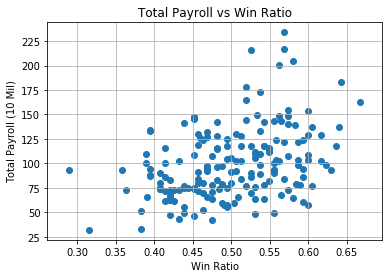

In [54]:
plt.scatter(mlb_merged_df["Win Ratio"],mlb_merged_df["RelPayPerYear"])
plt.xlabel("Win Ratio")
plt.ylabel("Total Payroll (10 Mil)")
plt.title("Total Payroll vs Win Ratio")
plt.grid()

In [92]:
access_level = "trial"
version = "v6"
language_code = "en"
nhl_years = [2013,2014,2015,2016,2017,2018]
nhl_season = "REG"
format = "json"

nhl_data = []
for year in nhl_years:
    response = requests.get(
        url=f"https://api.sportradar.us/nhl/{access_level}/{version}/{language_code}/seasons/{year}/{nhl_season}/standings.{format}?api_key={nhl_api_key}"
    )
    response = response.json()
    nhl_data.append(response)
    time.sleep(1)

In [91]:
nhl_team_names = []
nhl_win_ratio = []
nhl_year = []
nhl_p_dif = []
#loop through east/west
for w in range(0,len(nhl_data)):
    for z in range(0,len(nhl_data[w]['conferences'])):
        #loop through division
        for y in range(0,len(nhl_data[w]['conferences'][z]['divisions'])):
            #loop through each team
            for x in range(0,len(nhl_data[w]['conferences'][z]['divisions'][y]['teams'])):
                nhl_team_names.append(nhl_data[w]['conferences'][z]['divisions'][y]['teams'][x]['name'])
                nhl_win_ratio.append(nhl_data[w]['conferences'][z]['divisions'][y]['teams'][x]['win_pct'])
                nhl_year.append(nhl_data[w]['season']['year'])
                nhl_p_dif.append(nhl_data[w]['conferences'][z]['divisions'][y]['teams'][x]['goal_diff'])

In [93]:
nhl_df = pd.DataFrame({
    "Team Name": nhl_team_names,
    "Win Ratio": nhl_win_ratio,
    "NHL Year": nhl_year,
    "Goal Diff": nhl_p_dif,
    "Sport": "NHL"
})
nhl_df["TeamYear"] = nhl_df["Team Name"] + nhl_df["NHL Year"].map(str)
nhl_df = nhl_df[["TeamYear", "Win Ratio","Goal Diff","Sport"]]
nhl_df.head(5)

,TeamYear,Win Ratio,Goal Diff,Sport
0,Avalanche2013,0.634,30,NHL
1,Blues2013,0.634,57,NHL
2,Blackhawks2013,0.561,47,NHL
3,Wild2013,0.524,1,NHL
4,Stars2013,0.488,7,NHL


In [94]:
nhl_sal_path = "NHLFiles/NHLcap.csv"
nhl_sal_df = pd.read_csv(nhl_sal_path)

In [95]:
nhl_merged_df = pd.merge(nhl_df, nhl_sal_df, on ="TeamYear")

In [ ]:
nhl_merged_df.head(5)

In [96]:
nhl_merged_df = nhl_merged_df[["TeamYear","Win Ratio","RelTotPay","Sport"]]
nhl_merged_df = nhl_merged_df.rename(columns = {"RelTotPay": "RelPayPerYear"})
nhl_merged_df.head(5)

,TeamYear,Win Ratio,RelPayPerYear,Sport
0,Avalanche2013,0.634,97.066279,NHL
1,Blues2013,0.634,99.810437,NHL
2,Blackhawks2013,0.561,119.278289,NHL
3,Stars2013,0.488,75.777388,NHL
4,Predators2013,0.463,83.692067,NHL


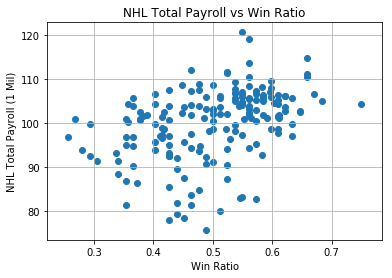

In [97]:
plt.scatter(nhl_merged_df["Win Ratio"],nhl_merged_df["RelPayPerYear"])
plt.xlabel("Win Ratio")
plt.ylabel("NHL Total Payroll (1 Mil)")
plt.title("NHL Total Payroll vs Win Ratio")
plt.grid()

In [98]:
all_sports_df = pd.concat([mlb_merged_df,nhl_merged_df,nba_newmerge_df,nfl_newmerge_df])
all_sports_df.head()
gb_sports_df = all_sports_df.groupby("Sport")
gb_sports_df.head(5)

,TeamYear,Win Ratio,RelPayPerYear,Sport
0,Dodgers2013,0.568,216.401218,MLB
1,Diamondbacks2013,0.500,79.667535,MLB
2,Giants2013,0.469,126.542371,MLB
3,Padres2013,0.469,66.109318,MLB
4,Rockies2013,0.457,71.508454,MLB
0,Avalanche2013,0.634,97.066279,NHL
1,Blues2013,0.634,99.810437,NHL
2,Blackhawks2013,0.561,119.278289,NHL
3,Stars2013,0.488,75.777388,NHL
4,Predators2013,0.463,83.692067,NHL


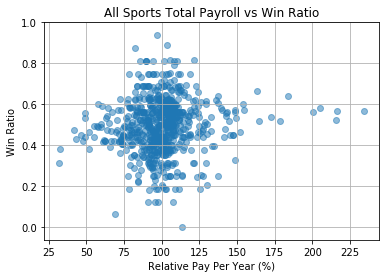

In [99]:
plt.scatter(all_sports_df["RelPayPerYear"],all_sports_df["Win Ratio"],alpha=0.50)
plt.xlabel("Relative Pay Per Year (%)")
plt.ylabel("Win Ratio")
plt.title("All Sports Total Payroll vs Win Ratio")
plt.grid()

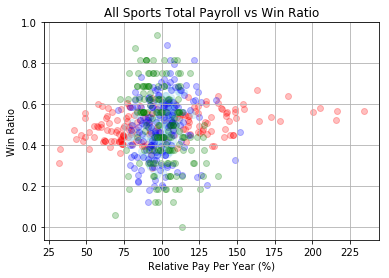

In [100]:
#mlb_merged_df,nhl_merged_df,nba_newmerge_df,nfl_newmerge_df
plt.scatter(mlb_merged_df["RelPayPerYear"],mlb_merged_df["Win Ratio"],alpha=0.25,color="r")
plt.scatter(nhl_merged_df["RelPayPerYear"],nhl_merged_df["Win Ratio"],alpha=0.25,color="skyblue")
plt.scatter(nba_newmerge_df["RelPayPerYear"],nba_newmerge_df["Win Ratio"],alpha=0.25,color="b")
plt.scatter(nfl_newmerge_df["RelPayPerYear"],nfl_newmerge_df["Win Ratio"],alpha=0.25,color="g")
plt.xlabel("Relative Pay Per Year (%)")
plt.ylabel("Win Ratio")
plt.title("All Sports Total Payroll vs Win Ratio")
plt.grid()

In [101]:
#Stats
#X = df["RM"]
# y = target["MEDV"]

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

X = all_sports_df["RelPayPerYear"]
y = all_sports_df["Win Ratio"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Win Ratio   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     6415.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                 284.76
No. Observations:                 684   AIC:                            -567.5
Df Residuals:                     683   BIC:                            -563.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
RelPayPerYear     0.0048   5.98e-05     80.093      0.000       0.005       0.005
==============================================================================
Omnibus:                       20.348   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.590
Skew:                          -0.370   Prob(JB):                     1.24e-05
Kurtosis:                       3.495   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
####  Working with Point Differential


In [102]:
nba_combined_df.head()


,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay,Sport
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6,NBA
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9,NBA
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3,NBA
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8,NBA
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8,NBA


In [103]:
nba_combined_df["Point Diff"] = nba_combined_df["Points For"] - nba_combined_df["Points Against"]

In [104]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay,Sport,Point Diff
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6,NBA,6.98
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9,NBA,4.81
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3,NBA,2.63
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8,NBA,-2.90
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8,NBA,-6.29


In [105]:
nfl_merged.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential,Payroll,Relative Payroll,Sport
0,2014Patriots,0.750,2014,468.0,313.0,155.0,132130517.0,96.312633,NFL
1,2014Bills,0.563,2014,343.0,289.0,54.0,135589765.0,98.834149,NFL
2,2014Dolphins,0.500,2014,388.0,373.0,15.0,144645040.0,105.434724,NFL
3,2014Jets,0.250,2014,283.0,401.0,-118.0,106085353.0,77.327781,NFL
4,2014Steelers,0.688,2014,436.0,368.0,68.0,138857568.0,101.216117,NFL


In [ ]:
nfl_merged["Point Diff per Game"]= nfl_merged["Point Differential"]/16

In [107]:
nfl_merged.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential,Payroll,Relative Payroll,Sport,Point Diff per Game
0,2014Patriots,0.750,2014,468.0,313.0,155.0,132130517.0,96.312633,NFL,9.6875
1,2014Bills,0.563,2014,343.0,289.0,54.0,135589765.0,98.834149,NFL,3.3750
2,2014Dolphins,0.500,2014,388.0,373.0,15.0,144645040.0,105.434724,NFL,0.9375
3,2014Jets,0.250,2014,283.0,401.0,-118.0,106085353.0,77.327781,NFL,-7.3750
4,2014Steelers,0.688,2014,436.0,368.0,68.0,138857568.0,101.216117,NFL,4.2500


In [109]:
nhl_df.head()

,TeamYear,Win Ratio,Goal Diff,Sport
0,Avalanche2013,0.634,30,NHL
1,Blues2013,0.634,57,NHL
2,Blackhawks2013,0.561,47,NHL
3,Wild2013,0.524,1,NHL
4,Stars2013,0.488,7,NHL


In [112]:
nhl_df["Goal Diff per Game"]= nhl_df["Goal Diff"]/82

In [114]:
nhl_df.head()

,TeamYear,Win Ratio,Goal Diff,Sport,Goal Diff per Game
0,Avalanche2013,0.634,30,NHL,0.365854
1,Blues2013,0.634,57,NHL,0.695122
2,Blackhawks2013,0.561,47,NHL,0.573171
3,Wild2013,0.524,1,NHL,0.012195
4,Stars2013,0.488,7,NHL,0.085366


In [118]:
nhl_diff_max = nhl_df["Goal Diff per Game"].max()

In [119]:
nhl_diff_min= nhl_df["Goal Diff per Game"].min()

In [120]:
nba_diff_max =nba_combined_df["Point Diff"].max()

In [123]:
nba_diff_min = nba_combined_df["Point Diff"].min()

In [122]:
nfl_diff_max = nfl_merged["Point Diff per Game"].max()

In [124]:
nfl_diff_min = nfl_merged["Point Diff per Game"].min()

In [125]:
print(nfl_diff_max)
print(nfl_diff_min)
print(nba_diff_max)
print(nba_diff_min)
print(nhl_diff_max)
print(nhl_diff_min)

12.0
-12.5
11.629999999999995
-10.450000000000003
1.024390243902439
-1.3780487804878048


In [126]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay,Sport,Point Diff
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6,NBA,6.98
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9,NBA,4.81
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3,NBA,2.63
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8,NBA,-2.90
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8,NBA,-6.29


In [127]:
nba_combined_df["Adjusted PD"] = nba_combined_df["Point Diff"]-nba_diff_min

In [128]:
nba_combined_df["Relative PD"]= nba_combined_df["Adjusted PD"]/(nba_diff_max-nba_diff_min)

In [129]:
nba_combined_df.head()

,Season,Regular Season or Playoffs,City,Team,Conference,Division,Wins,Losses,Win Pct.,Points For,Points Against,ConcatName,Cap,Rank,YearMeanCap,RelativePay,Sport,Point Diff,Adjusted PD,Relative PD
0,2013,Regular,Los Angeles,Clippers,WESTERN,PACIFIC,57,25,0.695,107.93,100.95,Clippers2013,"$69,518,889",22,"$67,104,799",103.6,NBA,6.98,17.43,0.789402
1,2013,Regular,Golden State,Warriors,WESTERN,PACIFIC,51,31,0.622,104.26,99.45,Warriors2013,"$69,712,825",24,"$67,104,799",103.9,NBA,4.81,15.26,0.691123
2,2013,Regular,Phoenix,Suns,WESTERN,PACIFIC,48,34,0.585,105.23,102.60,Suns2013,"$53,234,902",1,"$67,104,799",79.3,NBA,2.63,13.08,0.592391
3,2013,Regular,Sacramento,Kings,WESTERN,PACIFIC,28,54,0.341,100.50,103.40,Kings2013,"$53,575,342",2,"$67,104,799",79.8,NBA,-2.90,7.55,0.341938
4,2013,Regular,Los Angeles,Lakers,WESTERN,PACIFIC,27,55,0.329,102.95,109.24,Lakers2013,"$99,847,565",30,"$67,104,799",148.8,NBA,-6.29,4.16,0.188406


In [130]:
nfl_merged["Adjusted PD"] = nfl_merged["Point Diff per Game"]-nfl_diff_min

In [131]:
nfl_merged["Relative PD"] = nfl_merged["Adjusted PD"]/(nfl_diff_max-nfl_diff_min)

In [132]:
nfl_merged.head()

,Team,Win Pct,Year,Points For,Points Against,Point Differential,Payroll,Relative Payroll,Sport,Point Diff per Game,Adjusted PD,Relative PD
0,2014Patriots,0.750,2014,468.0,313.0,155.0,132130517.0,96.312633,NFL,9.6875,22.1875,0.905612
1,2014Bills,0.563,2014,343.0,289.0,54.0,135589765.0,98.834149,NFL,3.3750,15.8750,0.647959
2,2014Dolphins,0.500,2014,388.0,373.0,15.0,144645040.0,105.434724,NFL,0.9375,13.4375,0.548469
3,2014Jets,0.250,2014,283.0,401.0,-118.0,106085353.0,77.327781,NFL,-7.3750,5.1250,0.209184
4,2014Steelers,0.688,2014,436.0,368.0,68.0,138857568.0,101.216117,NFL,4.2500,16.7500,0.683673


In [133]:
nhl_df["Adjusted PD"]= nhl_df["Goal Diff per Game"]-nhl_diff_min

In [135]:
nhl_df["Relative PD"]= nhl_df["Adjusted PD"]/(nhl_diff_max-nhl_diff_min)

In [136]:
nhl_df.head()

,TeamYear,Win Ratio,Goal Diff,Sport,Goal Diff per Game,Adjusted PD,Relative PD
0,Avalanche2013,0.634,30,NHL,0.365854,1.743902,0.725888
1,Blues2013,0.634,57,NHL,0.695122,2.073171,0.862944
2,Blackhawks2013,0.561,47,NHL,0.573171,1.951220,0.812183
3,Wild2013,0.524,1,NHL,0.012195,1.390244,0.578680
4,Stars2013,0.488,7,NHL,0.085366,1.463415,0.609137


In [138]:
nba_point_diff_df = nba_combined_df[["ConcatName","Relative PD"]]

In [139]:
nba_point_diff_df.head()

,ConcatName,Relative PD
0,Clippers2013,0.789402
1,Warriors2013,0.691123
2,Suns2013,0.592391
3,Kings2013,0.341938
4,Lakers2013,0.188406


In [145]:
nba_point_diff_df.rename(columns={"ConcatName":"TeamYear"})

,TeamYear,Relative PD
0,Clippers2013,0.789402
1,Warriors2013,0.691123
2,Suns2013,0.592391
3,Kings2013,0.341938
4,Lakers2013,0.188406
5,Rockets2013,0.679801
6,Grizzlies2013,0.544837
7,Mavericks2013,0.581975
8,Pelicans2013,0.350543
9,Thunder2013,0.760417


In [146]:
nhl_point_diff_df = nhl_df[["TeamYear","Relative PD"]]

In [147]:
nhl_point_diff_df

,TeamYear,Relative PD
0,Avalanche2013,0.725888
1,Blues2013,0.862944
2,Blackhawks2013,0.812183
3,Wild2013,0.578680
4,Stars2013,0.609137
5,Predators2013,0.441624
6,Jets2013,0.522843
7,Ducks2013,0.862944
8,Sharks2013,0.822335
9,Kings2013,0.736041


In [149]:
nfl_point_diff_df = nfl_merged[["Team","Relative PD"]]

In [152]:
nfl_point_diff_df.rename(columns={"Team":"TeamYear"})

,TeamYear,Relative PD
0,2014Patriots,0.905612
1,2014Bills,0.647959
2,2014Dolphins,0.548469
3,2014Jets,0.209184
4,2014Steelers,0.683673
5,2014Bengals,0.563776
6,2014Ravens,0.783163
7,2014Browns,0.413265
8,2014Colts,0.737245
9,2014Texans,0.676020


In [154]:
all_sports_point_diff_df= pd.concat([nba_point_diff_df,nfl_point_diff_df,nhl_point_diff_df])

/Users/henrynahmad/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
